<IPython.core.display.Javascript object>


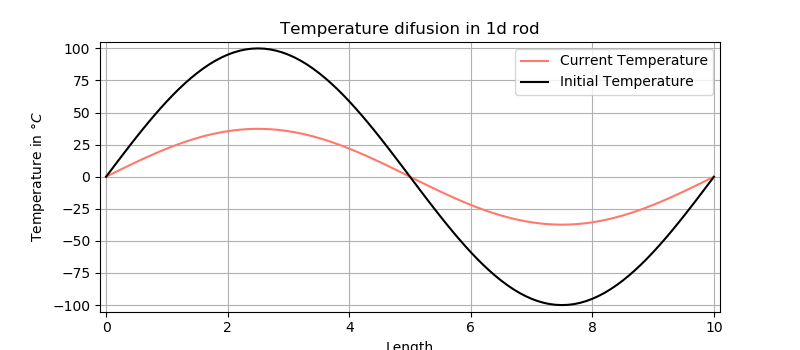

In [43]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook


L = 10
nx = 100
T = 500
nt = 500
alpha = 5e-3

x = np.linspace(0, L, nx+1)
dx = x[1]-x[0]
t = np.linspace(0, T, nt+1)
dt = t[1]-t[0]
F = alpha*dt/dx**2
fac = 1. - 2.*F


Temp_init = 100*np.sin(2*np.pi*x/L)

Temp_old = np.copy(Temp_init)
Temp_new = np.zeros(nx+1)

fig, ax = plt.subplots(figsize = (8,3.5))

ax.set_xlabel('Length', fontsize = 10)
ax.set_ylabel('Temperature in $°C$', fontsize = 10)
ax.set_xlim(-0.1, 10.1)
ax.set_ylim(-105,105)
ax.set_title('Temperature difusion in 1d rod')

#---------------

#lines = ax.plot(Temp_new)
line, = ax.plot(x,Temp_new, label = 'Current Temperature', color = 'xkcd:salmon')
line1, = ax.plot(x,Temp_init, label = 'Initial Temperature', color = 'xkcd:black')

ax.legend()
plt.grid(True)


for n in range(0,nt):
    Temp_new[1:-1] = fac*Temp_old[1:-1] + F*(Temp_old[0:-2] + Temp_old[2:])
    Temp_old[:] = Temp_new
    if n%3 == 0:
        line.set_ydata(Temp_new)
        plt.gcf().canvas.draw()
